# Multiple Scatter Simulations with `k100Sim`

The previous `iPy` notebook `ms_simulation_explore.ipynb` explored ways that I can use `pandas` to reduce the simulated dataset. Here I want to do this for the entire dataset. To start off with I'll try this in a notebook, and use the standard format for the data reduction into `h5` files produced by:

```./sima2py.py --regex 'Cf252_k100_0x0000_10M_\S+.txt' --filedir /data/chocula/villaa/k100Sim_Data/252Cf/ --outfile /data/chocula/villaa/k100Sim_Data/252Cf/Cf252_0x0000.h5```

The hope is then that the analysis here can be absporbed into `sima2py.py` and be a better way to select and store this simulation data, without going through ROOT or anything. 

In [1]:
import numpy as np
import pandas as pd
import sima2py as sapy

In [2]:
#play around with some hits data stored in h5 file
#===============to suppress h5py warning see:
#https://github.com/h5py/h5py/issues/961
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import h5py
warnings.resetwarnings()
f = h5py.File("/data/chocula/villaa/k100Sim_Data/252Cf/Cf252_0x0000.h5","r")
f_shield = h5py.File("/data/chocula/villaa/k100Sim_Data/252Cf/Cf252_0x0001.h5","r")


data = f['geant4/hits']
data_shield = f['geant4/hits']

In [3]:
#using the examples above let's get byzantine and make a bad-ass data frame.

#first do some cuts:
#first some hit-level cuts
cHVDet = np.zeros(np.shape(data)[0],dtype=bool)
cZeroEdep = np.zeros(np.shape(data)[0],dtype=bool)
cNeutron = np.zeros(np.shape(data)[0],dtype=bool)
cGamma = np.zeros(np.shape(data)[0],dtype=bool)
cNR = np.zeros(np.shape(data)[0],dtype=bool)

cHVDet[data[:,1]==1] = True
cZeroEdep[data[:,6]==0] = True
cNeutron[data[:,4]==2112] = True
cGamma[data[:,4]==22] = True
cNR[data[:,4]>3000] = True

cHVDet_shield = np.zeros(np.shape(data_shield)[0],dtype=bool)
cZeroEdep_shield = np.zeros(np.shape(data_shield)[0],dtype=bool)
cNeutron_shield = np.zeros(np.shape(data_shield)[0],dtype=bool)
cGamma_shield = np.zeros(np.shape(data_shield)[0],dtype=bool)
cNR_shield = np.zeros(np.shape(data_shield)[0],dtype=bool)

cHVDet_shield[data_shield[:,1]==1] = True
cZeroEdep_shield[data_shield[:,6]==0] = True
cNeutron_shield[data_shield[:,4]==2112] = True
cGamma_shield[data_shield[:,4]==22] = True
cNR_shield[data_shield[:,4]>3000] = True



#now make a dataframe with the restricted data
nr_data = data[:,[0,4,5,6,21]]
nr_data = nr_data[cHVDet&~cZeroEdep&cNR,:]
nr_dataframe = pd.DataFrame(data=nr_data)

#now make a dataframe with the restricted data
nr_data_shield = data_shield[:,[0,4,5,6,21]]
nr_data_shield = nr_data_shield[cHVDet_shield&~cZeroEdep_shield&cNR_shield,:]
print(np.shape(nr_data_shield))
nr_dataframe_shield = pd.DataFrame(data=nr_data_shield)

#print(nr_dataframe)


groupbyvec=[0]
#print(np.max(nr_dataframe.groupby([0,1],axis=0).size()))
max_vec = np.max(nr_dataframe.groupby(groupbyvec,axis=0).size())

evec = np.zeros((0,max_vec))
nhit = np.zeros((0,1))

for i in nr_dataframe.groupby(groupbyvec,axis=0)[3].apply(list):
    #print(i)
    #print(np.shape(i))
    vector = np.zeros((1,max_vec))
    #print(np.shape(vector[0,0:np.shape(i)[0]]))
    vector[0,0:np.shape(i)[0]] = np.transpose(np.asarray(i))
    evec = np.append(evec,vector,0)
    nhit = np.append(nhit,np.shape(i)[0])
    
print(np.shape(evec))
print(np.shape(nhit))
#print(max_vec)
#print(np.sum(evec,1))
print(np.sum(nhit[nhit==1]))

max_vec_shield = np.max(nr_dataframe_shield.groupby(groupbyvec,axis=0).size())

evec_shield = np.zeros((0,max_vec_shield))
nhit_shield = np.zeros((0,1))

for i in nr_dataframe_shield.groupby(groupbyvec,axis=0)[3].apply(list):
    #print(i)
    #print(np.shape(i))
    vector = np.zeros((1,max_vec))
    #print(np.shape(vector[0,0:np.shape(i)[0]]))
    vector[0,0:np.shape(i)[0]] = np.transpose(np.asarray(i))
    evec_shield = np.append(evec_shield,vector,0)
    nhit_shield = np.append(nhit_shield,np.shape(i)[0])
    
print(np.shape(evec_shield))
print(np.shape(nhit_shield))
#print(max_vec)
#print(np.sum(evec,1))
print(np.sum(nhit_shield[nhit_shield==1]))

(418525, 5)
(187854, 25)
(187854,)
88760.0
(187854, 25)
(187854,)
88760.0


In [4]:
#make some histograms

xmax = 100
n_ss,nx_ss = np.histogram(np.sum(evec[nhit==1,:],1)*1000,250,range=(0,xmax))
n_ms,nx_ms = np.histogram(np.sum(evec[nhit>1,:],1)*1000,250,range=(0,xmax))


xc = (nx_ss[:-1] + nx_ss[1:]) / 2

In [5]:
#set up a plot 
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')

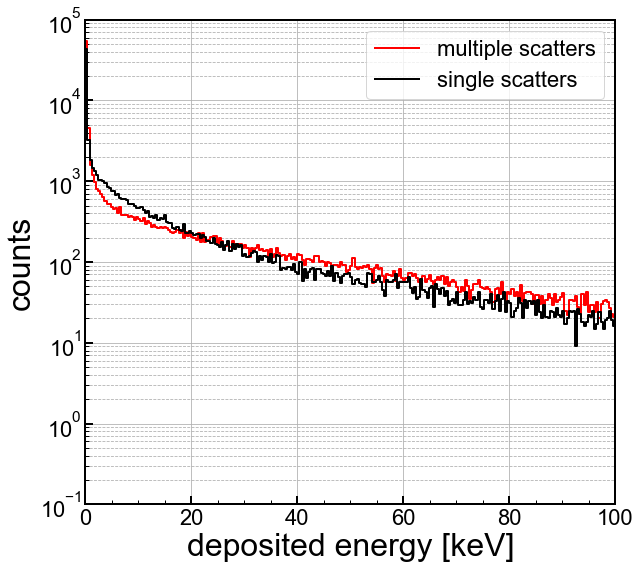

In [6]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

ymin=0.1
ymax=1e4
ax1.step(xc,n_ms, where='mid',color='r', linestyle='-', \
         label='multiple scatters', linewidth=2)
ax1.step(xc,n_ss, where='mid',color='k', linestyle='-', \
         label='single scatters', linewidth=2)




#tlabel = 'Thresh. {0} eV$_{{\mathrm{{ee}}}}$'.format(18)
#ax1.axvline(thresh, color='k', linestyle='--', lw=2, alpha=0.8,label=tlabel)
#erange_x = np.arange(thresh-sigthr, thresh+sigthr, 0.01)
#ax1.fill_between(erange_x, ymin, ymax, facecolor='r', alpha=0.3)

ax1.set_yscale('log')
ax1.set_xlim(0, xmax) #in pairs
ax1.set_ylim(0.1,1e5)
ax1.set_xlabel('deposited energy [keV]',**axis_font)
ax1.set_ylabel('counts',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/Cf252_ms_test.png')
plt.show()

In [7]:
#open and write file
of = h5py.File('k100_252Cf_noshield_NRs.h5', 'w')

d = evec 
#hits dataset
dset_hits = of.create_dataset("nr_Fano/nr_energies", np.shape(d), dtype=np.dtype('float64').type, compression="gzip", compression_opts=9)
dset_hits[...] = d

d = nhit
dset_hits = of.create_dataset("nr_Fano/nr_hits", np.shape(d), dtype=np.dtype('float64').type, compression="gzip", compression_opts=9)
dset_hits[...] = d

of.close()

In [8]:
#open and write file
of = h5py.File('k100_252Cf_shield_NRs.h5', 'w')

d = evec_shield 
#hits dataset
dset_hits = of.create_dataset("nr_Fano/nr_energies", np.shape(d), dtype=np.dtype('float64').type, compression="gzip", compression_opts=9)
dset_hits[...] = d

d = nhit_shield
dset_hits = of.create_dataset("nr_Fano/nr_hits", np.shape(d), dtype=np.dtype('float64').type, compression="gzip", compression_opts=9)
dset_hits[...] = d

of.close()